In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

In [2]:
month = pd.read_csv(r'Month.csv',low_memory=False)

In [3]:
month.shape

(124293, 1181)

In [124]:
model_data=pd.DataFrame() # make a new dataframe for simple attributes.
month['PrimaryKey'] = month.index
pkey=month.iloc[:,-1]

In [125]:
data=month.filter(regex=r'^(_|occurreddate_|rowtype_|medc_|status_)', axis=1)
ckey=month.iloc[:,0:2]
dataset=data.loc[:,~data.columns.str.contains('lag02|lag03|lag04|lag05|lag06|_hash|_id')]
dataset=dataset.copy()

## Column names that start with '_'

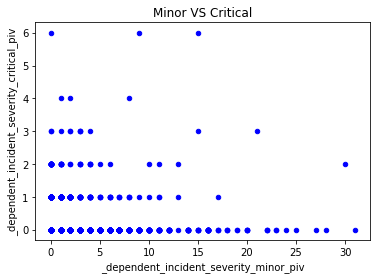

In [126]:
data1=dataset.filter(regex=r'^_', axis=1)
data1m=data1.iloc[:,1:4]
data1m['key']=pkey
data1m.plot.scatter(x='_dependent_incident_severity_minor_piv', y='_dependent_incident_severity_critical_piv',color='Blue',title='Minor VS Critical')

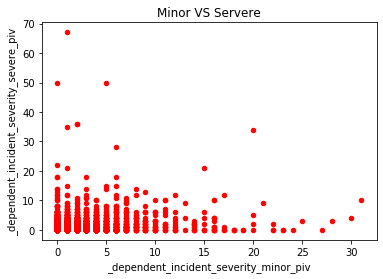

In [127]:
data1m.plot.scatter(x='_dependent_incident_severity_minor_piv', y='_dependent_incident_severity_severe_piv',color='Red',title='Minor VS Servere')

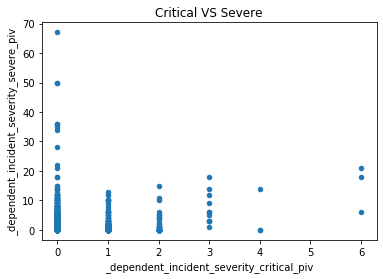

In [128]:
data1m.plot.scatter(x='_dependent_incident_severity_critical_piv', y='_dependent_incident_severity_severe_piv',title='Critical VS Severe')

From this plot, we can see that 'severe' is independent to 'Critical'

In [129]:
data1m.iloc[:,0:3].corr()

,_dependent_incident_severity_critical_piv,_dependent_incident_severity_minor_piv,_dependent_incident_severity_severe_piv
_dependent_incident_severity_critical_piv,1.000000,0.138081,0.177137
_dependent_incident_severity_minor_piv,0.138081,1.000000,0.306229
_dependent_incident_severity_severe_piv,0.177137,0.306229,1.000000


In [130]:
response=[]
numR=data1m.shape[0]
con=0
coun=0
for i in range(numR):
    severe=data1m.loc[i,'_dependent_incident_severity_severe_piv']
    critical=data1m.loc[i,'_dependent_incident_severity_critical_piv']
    minor=data1m.loc[i,'_dependent_incident_severity_minor_piv']
    if [severe,critical,minor] != [0,0,0]:
        response.append(1)
        coun+=1
    else:
        response.append(0)
        con+=1
model_data['Incident']=response
model_data['Incident'].value_counts()

0    115305
1      8988
Name: Incident, dtype: int64

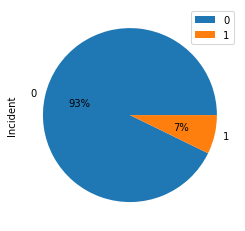

In [131]:
value_counts=model_data['Incident'].value_counts()
df_val_counts = pd.DataFrame(value_counts)
df = df_val_counts.reset_index()
lable=df['index']
df.plot.pie(y='Incident',autopct='%1.0f%%',labels=lable)

## Column names that start with 'occurreddate_'
Now I am moving to the data which column name start with "occurreddate".

In [132]:
data2=dataset.filter(regex=r'^occurreddate_', axis=1)
data2.isin([0]).sum()/124293

occurreddate_monthofyear    0.000000
occurreddate_weekofyear     0.000000
occurreddate_dayofweek      0.987835
occurreddate_dayofmonth     0.000000
occurreddate_dayofyear      0.000000
dtype: float64

In [133]:
data2.head(30)

,occurreddate_monthofyear,occurreddate_weekofyear,occurreddate_dayofweek,occurreddate_dayofmonth,occurreddate_dayofyear
0,4,14,0,3,93
1,5,18,0,1,121
2,6,22,0,1,152
3,7,27,0,1,182
4,8,31,0,1,213
5,9,35,0,1,244
6,10,40,0,1,274
7,11,44,0,1,305
8,12,1,0,1,335
9,1,1,0,1,1


From the column names we can know that, this columns stores the Date information, which can be treated as description.

## Column names that start with 'rowtype_'
The following data I am gone to analysis is the columns with name start at 'rowtype'

In [134]:
data3=dataset.filter(regex=r'^rowtype_', axis=1)
#data3.columns

In [135]:
data3piv=data3.filter(regex=r'_piv$', axis=1) #16 rows aggregate by one month
#data3piv.dtypes
data3piv.isin([0]).sum()/124293

rowtype_client_address_addition_piv               0.960947
rowtype_rp_end_piv                                0.998037
rowtype_rp_start_piv                              0.996500
rowtype_progress_note_piv                         0.376554
rowtype_diagnosis_piv                             0.978535
rowtype_medictn_start_piv                         0.986411
rowtype_client_plan_start_piv                     0.892053
rowtype_client_plan_end_piv                       0.967062
rowtype_keyworker_change_piv                      0.974005
rowtype_reference_piv                             0.000000
rowtype_medictn_end_piv                           0.993781
rowtype_plcment_end_piv                           0.977094
rowtype_incident_piv                              0.922618
rowtype_plcment_start_piv                         0.971913
rowtype_program_primary_service_type_start_piv    0.978044
rowtype_client_alert_start_piv                    0.990233
dtype: float64

In [136]:
coln=data3piv.shape[1]
for i in range(coln):
    name=data3piv.columns[i]
    num=data3piv[name].isin([0]).sum()/124293
    if num<0.99:
        model_data[name]=data3piv[name]
model_data.columns

Index(['Incident', 'rowtype_client_address_addition_piv',
       'rowtype_progress_note_piv', 'rowtype_diagnosis_piv',
       'rowtype_medictn_start_piv', 'rowtype_client_plan_start_piv',
       'rowtype_client_plan_end_piv', 'rowtype_keyworker_change_piv',
       'rowtype_reference_piv', 'rowtype_plcment_end_piv',
       'rowtype_incident_piv', 'rowtype_plcment_start_piv',
       'rowtype_program_primary_service_type_start_piv'],
      dtype='object')

In [137]:
data3sum=data3.filter(regex=r'_sum_n_days$', axis=1) #16 rows aggregate by 6 month
#data3sum.dtypes
data3sum.isin([0]).sum()/124293

rowtype_client_address_addition_piv_sum_n_days               0.780857
rowtype_rp_end_piv_sum_n_days                                0.989074
rowtype_rp_start_piv_sum_n_days                              0.982638
rowtype_progress_note_piv_sum_n_days                         0.184548
rowtype_diagnosis_piv_sum_n_days                             0.900300
rowtype_medictn_start_piv_sum_n_days                         0.946916
rowtype_client_plan_start_piv_sum_n_days                     0.613582
rowtype_client_plan_end_piv_sum_n_days                       0.879181
rowtype_keyworker_change_piv_sum_n_days                      0.856581
rowtype_reference_piv_sum_n_days                             0.000000
rowtype_medictn_end_piv_sum_n_days                           0.973056
rowtype_plcment_end_piv_sum_n_days                           0.952258
rowtype_incident_piv_sum_n_days                              0.795596
rowtype_plcment_start_piv_sum_n_days                         0.908362
rowtype_program_prim

In [ ]:
coln=data3sum.shape[1]
for i in range(coln):
    name=data3sum.columns[i]
    num=data3sum[name].isin([0]).sum()/124293
    if num<0.99:
        model_data[name]=data3sum[name]

In [138]:
data3avg=data3.filter(regex=r'_avg_n_days$', axis=1) #16 rows aggregate by the average of 6 month 
#data3avg.dtypes
data3avg.isin([0]).sum()/124293

rowtype_client_address_addition_piv_avg_n_days               0.999549
rowtype_rp_end_piv_avg_n_days                                0.999654
rowtype_rp_start_piv_avg_n_days                              0.999646
rowtype_progress_note_piv_avg_n_days                         0.939498
rowtype_diagnosis_piv_avg_n_days                             0.999437
rowtype_medictn_start_piv_avg_n_days                         0.999549
rowtype_client_plan_start_piv_avg_n_days                     0.999043
rowtype_client_plan_end_piv_avg_n_days                       0.999453
rowtype_keyworker_change_piv_avg_n_days                      0.999493
rowtype_reference_piv_avg_n_days                             0.000000
rowtype_medictn_end_piv_avg_n_days                           0.999638
rowtype_plcment_end_piv_avg_n_days                           0.999638
rowtype_incident_piv_avg_n_days                              0.999091
rowtype_plcment_start_piv_avg_n_days                         0.999525
rowtype_program_prim

In [ ]:
coln=data3avg.shape[1]
for i in range(coln):
    name=data3avg.columns[i]
    num=data3avg[name].isin([0]).sum()/124293
    if num<0.99:
        model_data[name]=data3avg[name]

In [139]:
data3since=data3.filter(regex=r'_days_since$', axis=1) #16 rows 
#data3since.dtypes
data3since.isin([0]).sum()/124293

rowtype_client_address_addition_piv_days_since               0.0
rowtype_rp_end_piv_days_since                                0.0
rowtype_rp_start_piv_days_since                              0.0
rowtype_progress_note_piv_days_since                         0.0
rowtype_diagnosis_piv_days_since                             0.0
rowtype_medictn_start_piv_days_since                         0.0
rowtype_client_plan_start_piv_days_since                     0.0
rowtype_client_plan_end_piv_days_since                       0.0
rowtype_keyworker_change_piv_days_since                      0.0
rowtype_reference_piv_days_since                             0.0
rowtype_medictn_end_piv_days_since                           0.0
rowtype_plcment_end_piv_days_since                           0.0
rowtype_incident_piv_days_since                              0.0
rowtype_plcment_start_piv_days_since                         0.0
rowtype_program_primary_service_type_start_piv_days_since    0.0
rowtype_client_alert_star

In [140]:
coln=data3since.shape[1]
for i in range(coln):
    name=data3since.columns[i]
    num=data3since[name].isin([0]).sum()/124293
    if num<0.99:
        model_data[name]=data3since[name]

In [141]:
data3since.head()

,rowtype_client_address_addition_piv_days_since,rowtype_rp_end_piv_days_since,rowtype_rp_start_piv_days_since,rowtype_progress_note_piv_days_since,rowtype_diagnosis_piv_days_since,rowtype_medictn_start_piv_days_since,rowtype_client_plan_start_piv_days_since,rowtype_client_plan_end_piv_days_since,rowtype_keyworker_change_piv_days_since,rowtype_reference_piv_days_since,rowtype_medictn_end_piv_days_since,rowtype_plcment_end_piv_days_since,rowtype_incident_piv_days_since,rowtype_plcment_start_piv_days_since,rowtype_program_primary_service_type_start_piv_days_since,rowtype_client_alert_start_piv_days_since
0,3650,3650,3650,2868,3650,3650,3650,3650,3650,131,3650,3650,3650,3650,3650,3650
1,3650,3650,3650,22,3650,3650,3650,3650,3650,1,3650,3650,3650,3650,3650,3650
2,2920,3650,3650,52,3650,3650,3650,3650,3650,1,3650,3650,3650,3650,3650,3650
3,22,3650,3650,21,3650,3650,3650,3650,3650,1,3650,3650,3650,3650,3650,3650
4,53,3650,3650,8,3650,3650,3650,3650,3650,1,3650,3650,3650,3650,3650,3650


In [142]:
data3lag=data3.filter(regex=r'_lag01$', axis=1)#16 rows aggregate number of one month ag, shift one down for '-piv' column
#data3lag.dtypes
data3lag.isna().sum()
#data3lag.isin([0]).sum()/124293

rowtype_client_address_addition_piv_lag01               14387
rowtype_rp_end_piv_lag01                                14387
rowtype_rp_start_piv_lag01                              14387
rowtype_progress_note_piv_lag01                         14387
rowtype_diagnosis_piv_lag01                             14387
rowtype_medictn_start_piv_lag01                         14387
rowtype_client_plan_start_piv_lag01                     14387
rowtype_client_plan_end_piv_lag01                       14387
rowtype_keyworker_change_piv_lag01                      14387
rowtype_reference_piv_lag01                             14387
rowtype_medictn_end_piv_lag01                           14387
rowtype_plcment_end_piv_lag01                           14387
rowtype_incident_piv_lag01                              14387
rowtype_plcment_start_piv_lag01                         14387
rowtype_program_primary_service_type_start_piv_lag01    14387
rowtype_client_alert_start_piv_lag01                    14387
dtype: i

In [143]:
coln=data3lag.shape[1]
for i in range(coln):
    name=data3lag.columns[i]
    num=data3lag[name].isin([0]).sum()/124293
    if num<0.99:
        model_data[name]=data3lag[name]

From the above view, we can known that the difference among these 5 groups is aggregate function. All of them are talk about the same type of variables.

,rowtype_client_address_addition_piv,rowtype_client_address_addition_piv_sum_n_days
rowtype_client_address_addition_piv,1.000000,0.365915
rowtype_client_address_addition_piv_sum_n_days,0.365915,1.000000


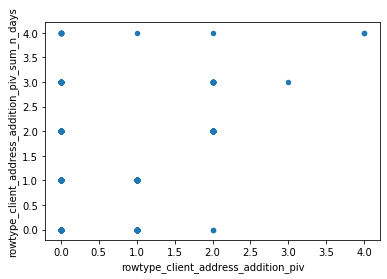

In [144]:
data3.plot.scatter(x='rowtype_client_address_addition_piv',y='rowtype_client_address_addition_piv_sum_n_days')
data3.loc[:,['rowtype_client_address_addition_piv','rowtype_client_address_addition_piv_sum_n_days']].corr()

## Columns that start with 'medc_'

In [145]:
data4=dataset.filter(regex=r'^medc_', axis=1)
data4.columns
#data4.describe()

Index(['medc_acqtype_1_piv', 'medc_acqtype_2_piv', 'medc_acqtype_3_piv',
       'medc_admintype_10_piv', 'medc_admintype_08_piv',
       'medc_admintype_09_piv', 'medc_admintype_04_piv',
       'medc_admintype_05_piv', 'medc_admintype_06_piv',
       'medc_admintype_07_piv', 'medc_admintype_11_piv',
       'medc_admintype_01_piv', 'medc_admintype_02_piv',
       'medc_admintype_03_piv', 'medc_levelofindependencetype_4_piv',
       'medc_levelofindependencetype_5_piv',
       'medc_levelofindependencetype_1_piv',
       'medc_levelofindependencetype_2_piv',
       'medc_levelofindependencetype_3_piv', 'medc_adminfreqid_1_piv',
       'medc_adminfreqid_2_piv', 'medc_adminfreqid_3_piv',
       'medc_adminfreqid_4_piv'],
      dtype='object')

In [146]:
count=[]
types=[1,2,3]
for i in range(numR):
    acq1=data4.loc[:,'medc_acqtype_1_piv']
    acq2=data4.loc[:,'medc_acqtype_2_piv']
    acq3=data4.loc[:,'medc_acqtype_3_piv']
    lst=[acq1[i]!=0,acq2[i]!=0,acq3[i]!=0]
    if True in lst:
        num=lst.index(True)
        count.append(types[num])
    else:
        count.append(0)
model_data['medc_acqtyp']=count 
model_data['medc_acqtyp'].value_counts()

0    122252
1      1837
2       190
3        14
Name: medc_acqtyp, dtype: int64

In [147]:
import matplotlib.axes as ax


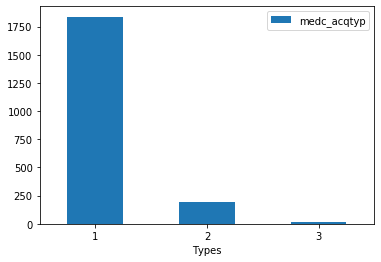

In [148]:
value_counts=model_data['medc_acqtyp'].value_counts()
df_val_counts = pd.DataFrame(value_counts)
df = df_val_counts.reset_index()
df.rename(columns={'index':'Types'},inplace=True)
df=df.drop([0])
df.plot.bar(x='Types',y='medc_acqtyp',rot=0)


In [149]:
admintype=data4.loc[:,'medc_admintype_10_piv':'medc_admintype_03_piv']
adm=[]
typ=[10,8,9,4,5,6,7,11,1,2,3]
for i in range(numR):
    lst=[]
    row=list(admintype.iloc[i,:])
    if max(row)>0:
        num=row.index(max(row))
        adm.append(typ[num])
    else:
        adm.append(0)
print(len(adm))
model_data['medc_admintype']=adm
model_data['medc_admintype'].value_counts()         

124293


0     122252
1       1584
7        203
5         98
4         34
11        33
10        29
6         19
2         18
3         14
9          6
8          3
Name: medc_admintype, dtype: int64

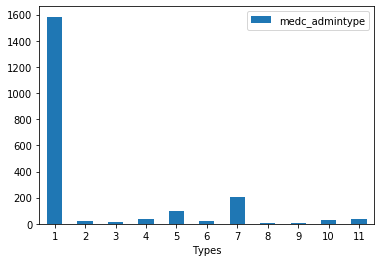

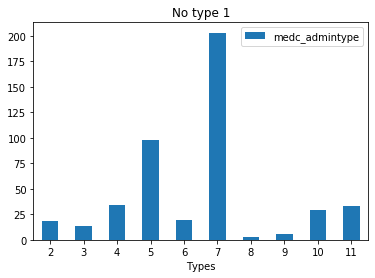

In [150]:
value_counts=model_data['medc_admintype'].value_counts()
df_val_counts = pd.DataFrame(value_counts)
df = df_val_counts.reset_index()
df=df.drop([0])
df=df.sort_values(by=['index'])
df.rename(columns={'index':'Types'},inplace=True)
df.plot.bar(x='Types',y='medc_admintype',rot=0)
dfj=df.drop([1])
dfj.plot.bar(x='Types',y='medc_admintype',title='No type 1',rot=0)

In [151]:
levelofinde=data4.loc[:,'medc_levelofindependencetype_4_piv':'medc_levelofindependencetype_3_piv']
level=[]
typ=[4,5,1,2,3]
for i in range(numR):
    lst=[]
    row=list(levelofinde.iloc[i,:])
    if max(row)>0:
        num=row.index(max(row))
        level.append(typ[num])
    else:
        level.append(0)
model_data['medc_levelofindependencetype']=level
model_data['medc_levelofindependencetype'].value_counts()

0    122252
4      1642
3       136
1       114
5        82
2        67
Name: medc_levelofindependencetype, dtype: int64

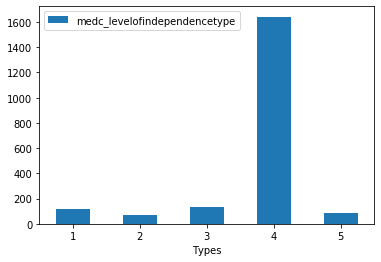

In [152]:
value_counts=model_data['medc_levelofindependencetype'].value_counts()
df_val_counts = pd.DataFrame(value_counts)
df = df_val_counts.reset_index()
df=df.drop([0])
df=df.sort_values(by=['index'])
df.rename(columns={'index':'Types'},inplace=True)
df.plot.bar(x='Types',y='medc_levelofindependencetype',rot=0)

In [153]:
admfid=data4.loc[:,'medc_adminfreqid_1_piv':'medc_adminfreqid_4_piv']
ids=[]
typ=[1,2,3,4]
for i in range(numR):
    lst=[]
    row=list(admfid.iloc[i,:])
    if max(row)>0:
        num=row.index(max(row))
        ids.append(typ[num])
    else:
        ids.append(0)
model_data['medc_adminfreqid']=ids
model_data['medc_adminfreqid'].value_counts()

0    122252
3      1200
1       403
4       394
2        44
Name: medc_adminfreqid, dtype: int64

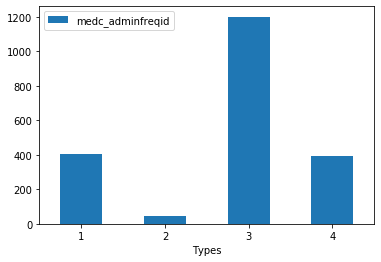

In [154]:
value_counts=model_data['medc_adminfreqid'].value_counts()
df_val_counts = pd.DataFrame(value_counts)
df = df_val_counts.reset_index()
df=df.drop([0])
df=df.sort_values(by=['index'])
df.rename(columns={'index':'Types'},inplace=True)
df.plot.bar(x='Types',y='medc_adminfreqid',rot=0)

## Columns that start with 'status_'

In [155]:
data5=dataset.filter(regex=r'^status_', axis=1)
data5.dtypes

status_placement                  object
status_client_plan                object
status_rp_mechanical_restraint    object
status_rp_restricted_access       object
status_rp_chemical_restraint      object
status_rp_other                   object
dtype: object

In [156]:
levels={}
dicN={}
for name in data5.columns:
    value=data5.loc[:,name]
    lst=[]
    for v in value:
        if v not in lst:
            lst.append(v)
        levels[name]=[lst] # the name of levels of each object columns
        dicN[name]=len(lst) # number of levels of each object columns

In [157]:
dicN #from this result we can know that those attributes are factors with 3 or 2 levels

{'status_placement': 3,
 'status_client_plan': 3,
 'status_rp_mechanical_restraint': 2,
 'status_rp_restricted_access': 3,
 'status_rp_chemical_restraint': 3,
 'status_rp_other': 3}

In [158]:
levels # The levels of each attributes.

{'status_placement': [['placement_none',
   'placement_current',
   'placement_ended']],
 'status_client_plan': [['client_plan_none',
   'client_plan_current',
   'client_plan_ended']],
 'status_rp_mechanical_restraint': [['rp_mechanical_restraint_none',
   'rp_mechanical_restraint_current']],
 'status_rp_restricted_access': [['rp_restricted_access_none',
   'rp_restricted_access_current',
   'rp_restricted_access_ended']],
 'status_rp_chemical_restraint': [['rp_chemical_restraint_none',
   'rp_chemical_restraint_current',
   'rp_chemical_restraint_ended']],
 'status_rp_other': [['rp_other_none', 'rp_other_current', 'rp_other_ended']]}

In [159]:
model_data['status_placement']=data5['status_placement']
data5['status_placement'].value_counts()

placement_none       111179
placement_current     10288
placement_ended        2826
Name: status_placement, dtype: int64

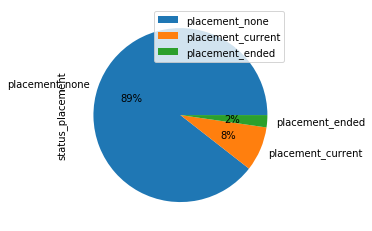

In [160]:
value_counts=data5['status_placement'].value_counts()
df_val_counts = pd.DataFrame(value_counts)
df = df_val_counts.reset_index()
lable=df['index']
df.plot.pie(y='status_placement',autopct='%1.0f%%',labels=lable)

In [161]:
model_data['status_client_plan']=data5['status_client_plan']
data5['status_client_plan'].value_counts()

client_plan_none       71780
client_plan_current    50416
client_plan_ended       2097
Name: status_client_plan, dtype: int64

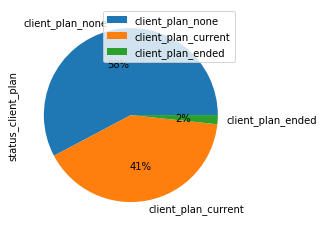

In [162]:
value_counts=data5['status_client_plan'].value_counts()
df_val_counts = pd.DataFrame(value_counts)
df = df_val_counts.reset_index()
lable=df['index']
df.plot.pie(y='status_client_plan',autopct='%1.0f%%',labels=lable)

In [163]:
model_data['status_rp_mechanical_restraint']=data5['status_rp_mechanical_restraint']
data5['status_rp_mechanical_restraint'].value_counts()

rp_mechanical_restraint_none       124200
rp_mechanical_restraint_current        93
Name: status_rp_mechanical_restraint, dtype: int64

In [164]:
model_data['status_rp_restricted_access']=data5['status_rp_restricted_access']
data5['status_rp_restricted_access'].value_counts()

rp_restricted_access_none       124226
rp_restricted_access_current        60
rp_restricted_access_ended           7
Name: status_rp_restricted_access, dtype: int64

In [165]:
model_data['status_rp_chemical_restraint']=data5['status_rp_chemical_restraint']
data5['status_rp_chemical_restraint'].value_counts()

rp_chemical_restraint_none       122232
rp_chemical_restraint_current      1898
rp_chemical_restraint_ended         163
Name: status_rp_chemical_restraint, dtype: int64

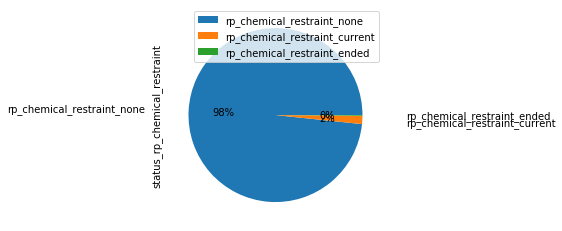

In [166]:
value_counts=data5['status_rp_chemical_restraint'].value_counts()
df_val_counts = pd.DataFrame(value_counts)
df = df_val_counts.reset_index()
lable=df['index']
df.plot.pie(y='status_rp_chemical_restraint',autopct='%1.0f%%',labels=lable,labeldistance=1.5)

In [167]:
model_data['status_rp_other']=data5['status_rp_other']
data5[ 'status_rp_other'].value_counts()

rp_other_none       123988
rp_other_current       271
rp_other_ended          34
Name: status_rp_other, dtype: int64

## Add these 6 columns to 'model'

In [168]:
model_data['status_placement']=data5['status_placement']
model_data['status_client_plan']=data5['status_client_plan']
model_data['status_rp_mechanical_restraint']=data5['status_rp_mechanical_restraint']
model_data['status_rp_restricted_access']=data5['status_rp_restricted_access']
model_data['status_rp_chemical_restraint']=data5['status_rp_chemical_restraint']
model_data[ 'status_rp_other']=data5[ 'status_rp_other']

## Columns with Incident value 1

In [ ]:
incident1=model_data.loc[model_data['Incident'] == 1]
incident1.columns

In [170]:
incident1['status_placement'].value_counts()/model_data['status_placement'].value_counts()

placement_none       0.064176
placement_current    0.158243
placement_ended      0.079618
Name: status_placement, dtype: float64

In [171]:
incident1['status_client_plan'].value_counts()/model_data['status_client_plan'].value_counts()

client_plan_current    0.098481
client_plan_ended      0.140200
client_plan_none       0.051950
Name: status_client_plan, dtype: float64

In [172]:
incident1['status_rp_mechanical_restraint'].value_counts()/model_data['status_rp_mechanical_restraint'].value_counts()

rp_mechanical_restraint_none       0.072045
rp_mechanical_restraint_current    0.430108
Name: status_rp_mechanical_restraint, dtype: float64

In [173]:
incident1['status_rp_restricted_access'].value_counts()/model_data['status_rp_restricted_access'].value_counts()

rp_restricted_access_none       0.072038
rp_restricted_access_current    0.550000
rp_restricted_access_ended      0.857143
Name: status_rp_restricted_access, dtype: float64

In [174]:
incident1['status_rp_chemical_restraint'].value_counts()/model_data['status_rp_chemical_restraint'].value_counts()

rp_chemical_restraint_none       0.069376
rp_chemical_restraint_current    0.248683
rp_chemical_restraint_ended      0.220859
Name: status_rp_chemical_restraint, dtype: float64

In [175]:
incident1['status_rp_other'].value_counts()/model_data['status_rp_other'].value_counts()

rp_other_none       0.071612
rp_other_current    0.346863
rp_other_ended      0.441176
Name: status_rp_other, dtype: float64

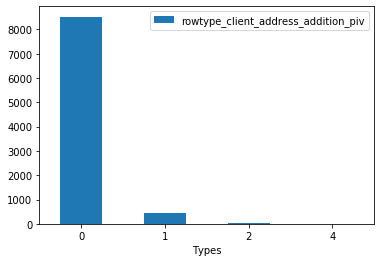

In [176]:
value_counts=incident1['rowtype_client_address_addition_piv'].value_counts()
df_val_counts = pd.DataFrame(value_counts)
df = df_val_counts.reset_index()
df.rename(columns={'index':'Types'},inplace=True)
df.plot.bar(x='Types',y='rowtype_client_address_addition_piv',rot=0)

In [ ]:
incident1.columns

In [178]:
df_val_counts

,rowtype_client_address_addition_piv
0,8523
1,442
2,21
4,2


## Encoder the Dataset

In [ ]:
coln=model_data.columns[1:]
for col in coln:
    model_data[col]=model_data[col].astype('object').copy()
model_data.columns

In [180]:
model_data.head()

,Incident,rowtype_client_address_addition_piv,rowtype_progress_note_piv,rowtype_diagnosis_piv,rowtype_medictn_start_piv,rowtype_client_plan_start_piv,rowtype_client_plan_end_piv,rowtype_keyworker_change_piv,rowtype_reference_piv,rowtype_plcment_end_piv,...,medc_acqtyp,medc_admintype,medc_levelofindependencetype,medc_adminfreqid,status_placement,status_client_plan,status_rp_mechanical_restraint,status_rp_restricted_access,status_rp_chemical_restraint,status_rp_other
0,0,0,1,0,0,0,0,0,28,0,...,0,0,0,0,placement_none,client_plan_none,rp_mechanical_restraint_none,rp_restricted_access_none,rp_chemical_restraint_none,rp_other_none
1,0,0,0,0,0,0,0,0,31,0,...,0,0,0,0,placement_none,client_plan_none,rp_mechanical_restraint_none,rp_restricted_access_none,rp_chemical_restraint_none,rp_other_none
2,0,1,0,0,0,0,0,0,30,0,...,0,0,0,0,placement_none,client_plan_none,rp_mechanical_restraint_none,rp_restricted_access_none,rp_chemical_restraint_none,rp_other_none
3,0,0,1,0,0,0,0,0,31,0,...,0,0,0,0,placement_none,client_plan_none,rp_mechanical_restraint_none,rp_restricted_access_none,rp_chemical_restraint_none,rp_other_none
4,0,0,2,0,0,0,0,0,31,0,...,0,0,0,0,placement_none,client_plan_none,rp_mechanical_restraint_none,rp_restricted_access_none,rp_chemical_restraint_none,rp_other_none


In [ ]:
model_data.dtypes

In [182]:
# Select the features that have 'Object' type
model_data= model_data.select_dtypes(include=['object']).copy()
model_data.head()

,rowtype_client_address_addition_piv,rowtype_progress_note_piv,rowtype_diagnosis_piv,rowtype_medictn_start_piv,rowtype_client_plan_start_piv,rowtype_client_plan_end_piv,rowtype_keyworker_change_piv,rowtype_reference_piv,rowtype_plcment_end_piv,rowtype_incident_piv,...,medc_acqtyp,medc_admintype,medc_levelofindependencetype,medc_adminfreqid,status_placement,status_client_plan,status_rp_mechanical_restraint,status_rp_restricted_access,status_rp_chemical_restraint,status_rp_other
0,0,1,0,0,0,0,0,28,0,0,...,0,0,0,0,placement_none,client_plan_none,rp_mechanical_restraint_none,rp_restricted_access_none,rp_chemical_restraint_none,rp_other_none
1,0,0,0,0,0,0,0,31,0,0,...,0,0,0,0,placement_none,client_plan_none,rp_mechanical_restraint_none,rp_restricted_access_none,rp_chemical_restraint_none,rp_other_none
2,1,0,0,0,0,0,0,30,0,0,...,0,0,0,0,placement_none,client_plan_none,rp_mechanical_restraint_none,rp_restricted_access_none,rp_chemical_restraint_none,rp_other_none
3,0,1,0,0,0,0,0,31,0,0,...,0,0,0,0,placement_none,client_plan_none,rp_mechanical_restraint_none,rp_restricted_access_none,rp_chemical_restraint_none,rp_other_none
4,0,2,0,0,0,0,0,31,0,0,...,0,0,0,0,placement_none,client_plan_none,rp_mechanical_restraint_none,rp_restricted_access_none,rp_chemical_restraint_none,rp_other_none


In [183]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
data=pd.DataFrame()

In [ ]:
names=model_data.columns
for n in names:
    data[n] = lb_make.fit_transform(model_data[n])
data.dtypes

In [185]:
data.head()

,rowtype_client_address_addition_piv,rowtype_progress_note_piv,rowtype_diagnosis_piv,rowtype_medictn_start_piv,rowtype_client_plan_start_piv,rowtype_client_plan_end_piv,rowtype_keyworker_change_piv,rowtype_reference_piv,rowtype_plcment_end_piv,rowtype_incident_piv,...,medc_acqtyp,medc_admintype,medc_levelofindependencetype,medc_adminfreqid,status_placement,status_client_plan,status_rp_mechanical_restraint,status_rp_restricted_access,status_rp_chemical_restraint,status_rp_other
0,0,1,0,0,0,0,0,27,0,0,...,0,0,0,0,2,2,1,2,2,2
1,0,0,0,0,0,0,0,30,0,0,...,0,0,0,0,2,2,1,2,2,2
2,1,0,0,0,0,0,0,29,0,0,...,0,0,0,0,2,2,1,2,2,2
3,0,1,0,0,0,0,0,30,0,0,...,0,0,0,0,2,2,1,2,2,2
4,0,2,0,0,0,0,0,30,0,0,...,0,0,0,0,2,2,1,2,2,2


In [186]:
data.head()

,rowtype_client_address_addition_piv,rowtype_progress_note_piv,rowtype_diagnosis_piv,rowtype_medictn_start_piv,rowtype_client_plan_start_piv,rowtype_client_plan_end_piv,rowtype_keyworker_change_piv,rowtype_reference_piv,rowtype_plcment_end_piv,rowtype_incident_piv,...,medc_acqtyp,medc_admintype,medc_levelofindependencetype,medc_adminfreqid,status_placement,status_client_plan,status_rp_mechanical_restraint,status_rp_restricted_access,status_rp_chemical_restraint,status_rp_other
0,0,1,0,0,0,0,0,27,0,0,...,0,0,0,0,2,2,1,2,2,2
1,0,0,0,0,0,0,0,30,0,0,...,0,0,0,0,2,2,1,2,2,2
2,1,0,0,0,0,0,0,29,0,0,...,0,0,0,0,2,2,1,2,2,2
3,0,1,0,0,0,0,0,30,0,0,...,0,0,0,0,2,2,1,2,2,2
4,0,2,0,0,0,0,0,30,0,0,...,0,0,0,0,2,2,1,2,2,2


In [187]:
data['Incident'] = response

In [188]:
data.shape

(124293, 55)

In [189]:
#data.to_csv('DataN.csv')